In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
from sklearn.decomposition import PCA
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:


df = pd.read_csv('Modified_HR_Employee_Attrition.csv')  
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})  # ✅ DO THIS FIRST!

📌 Domain Problem:
Organizations want to predict whether an employee is likely to leave (attrite) or stay based on various features such as job role, salary, satisfaction level, overtime status, etc.

•	Type of Machine Learning Task: Classification
•	Target Variable: Likely named Attrition (or similar), typically binary with values like Yes or No


In [14]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']  # already numeric now

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
#Detect missing values in training data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    
print("\nMissing values in training data:")
missing_values = X_train.isnull().mean()*100 
print(missing_values[missing_values > 0])


Missing values in training data:
Age                        19.132653
DailyRate                  18.282313
EnvironmentSatisfaction     4.676871
MonthlyIncome               9.778912
TotalWorkingYears          19.047619
dtype: float64


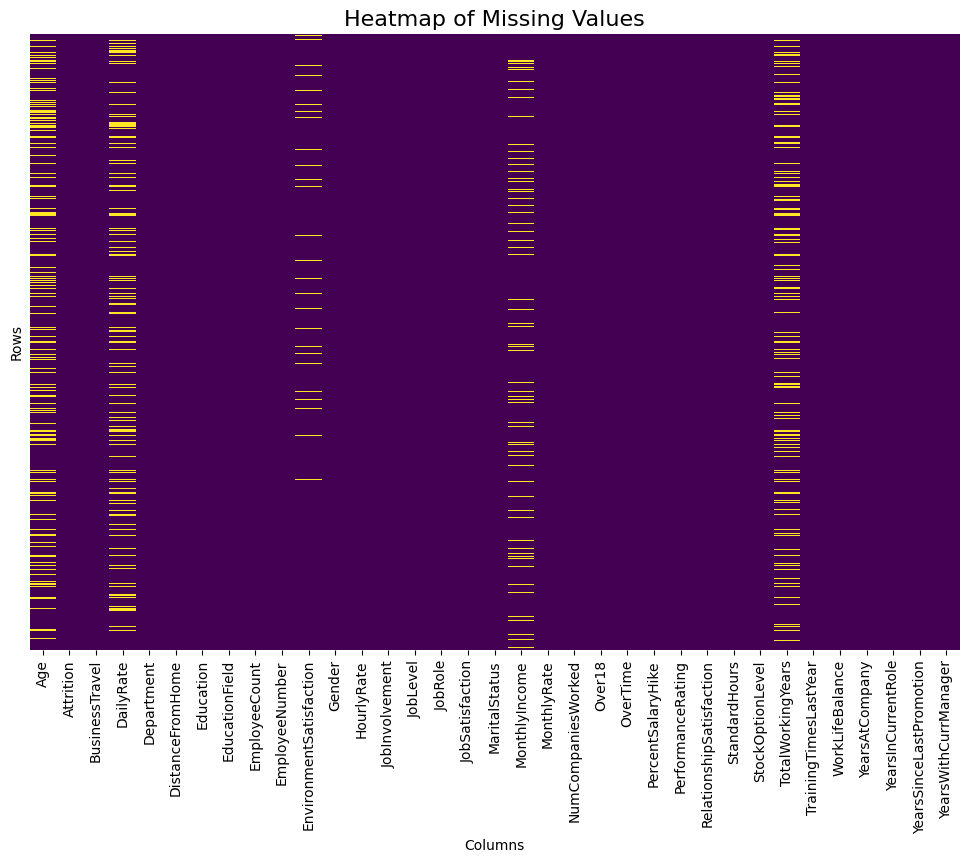

In [16]:


# Plot heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values", fontsize=16)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


What It Shows
Each row: Represents one observation (or employee record in your case).

Each column: Represents one feature/variable (e.g., Age, JobRole, MonthlyIncome, etc.).

Color meaning:

Yellow/bright → Missing value in that cell.

Purple/dark → Value is present (not missing).

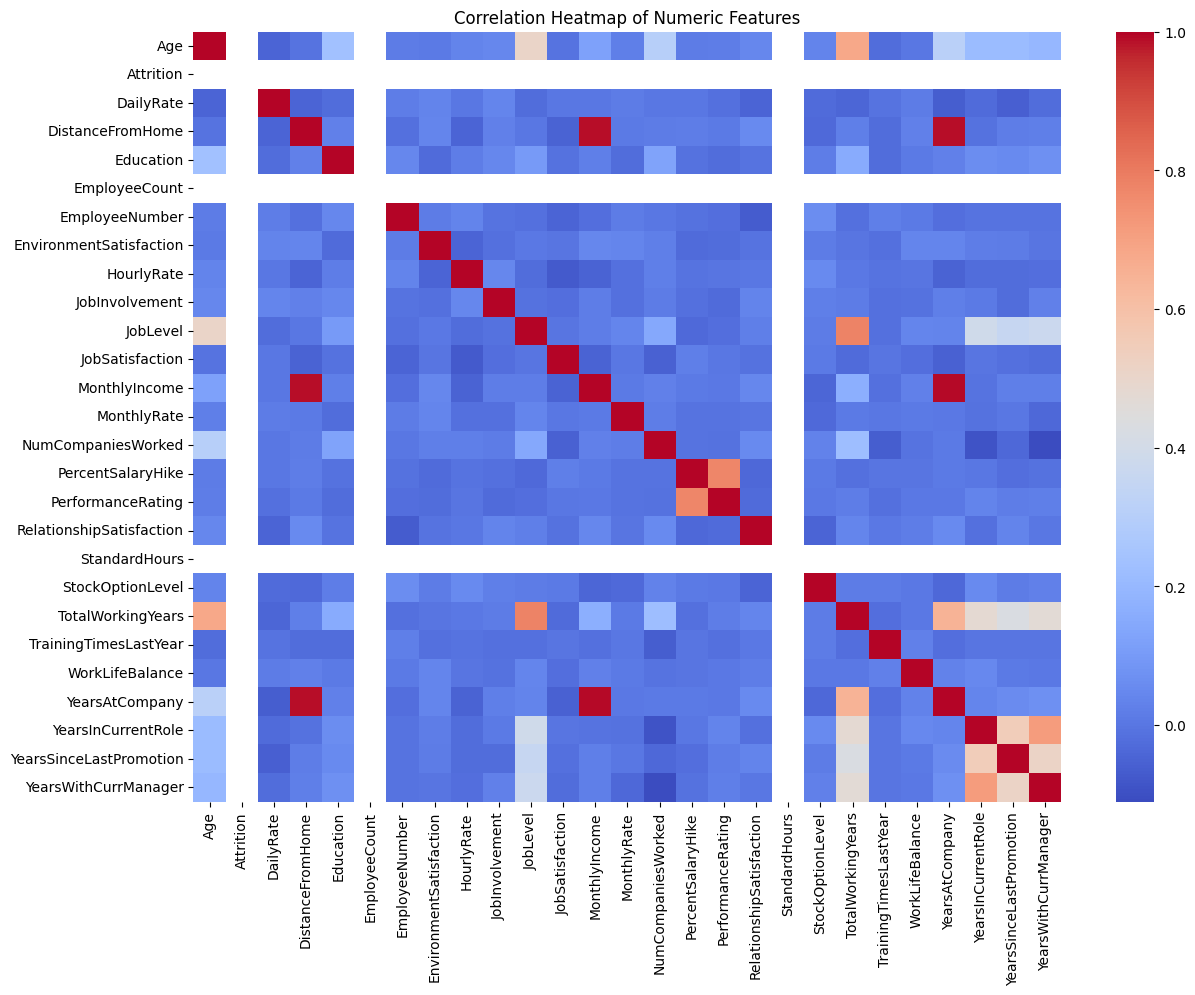

In [17]:
# Convert target to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Correlation measures the strength and direction of a linear relationship between two numeric variables. It gives a value between:
Diagonal values are always 1 because each feature is perfectly correlated with itself.

Color scale:

Dark red → High positive correlation

Dark blue → High negative correlation

Light colors → Weak or no correlation

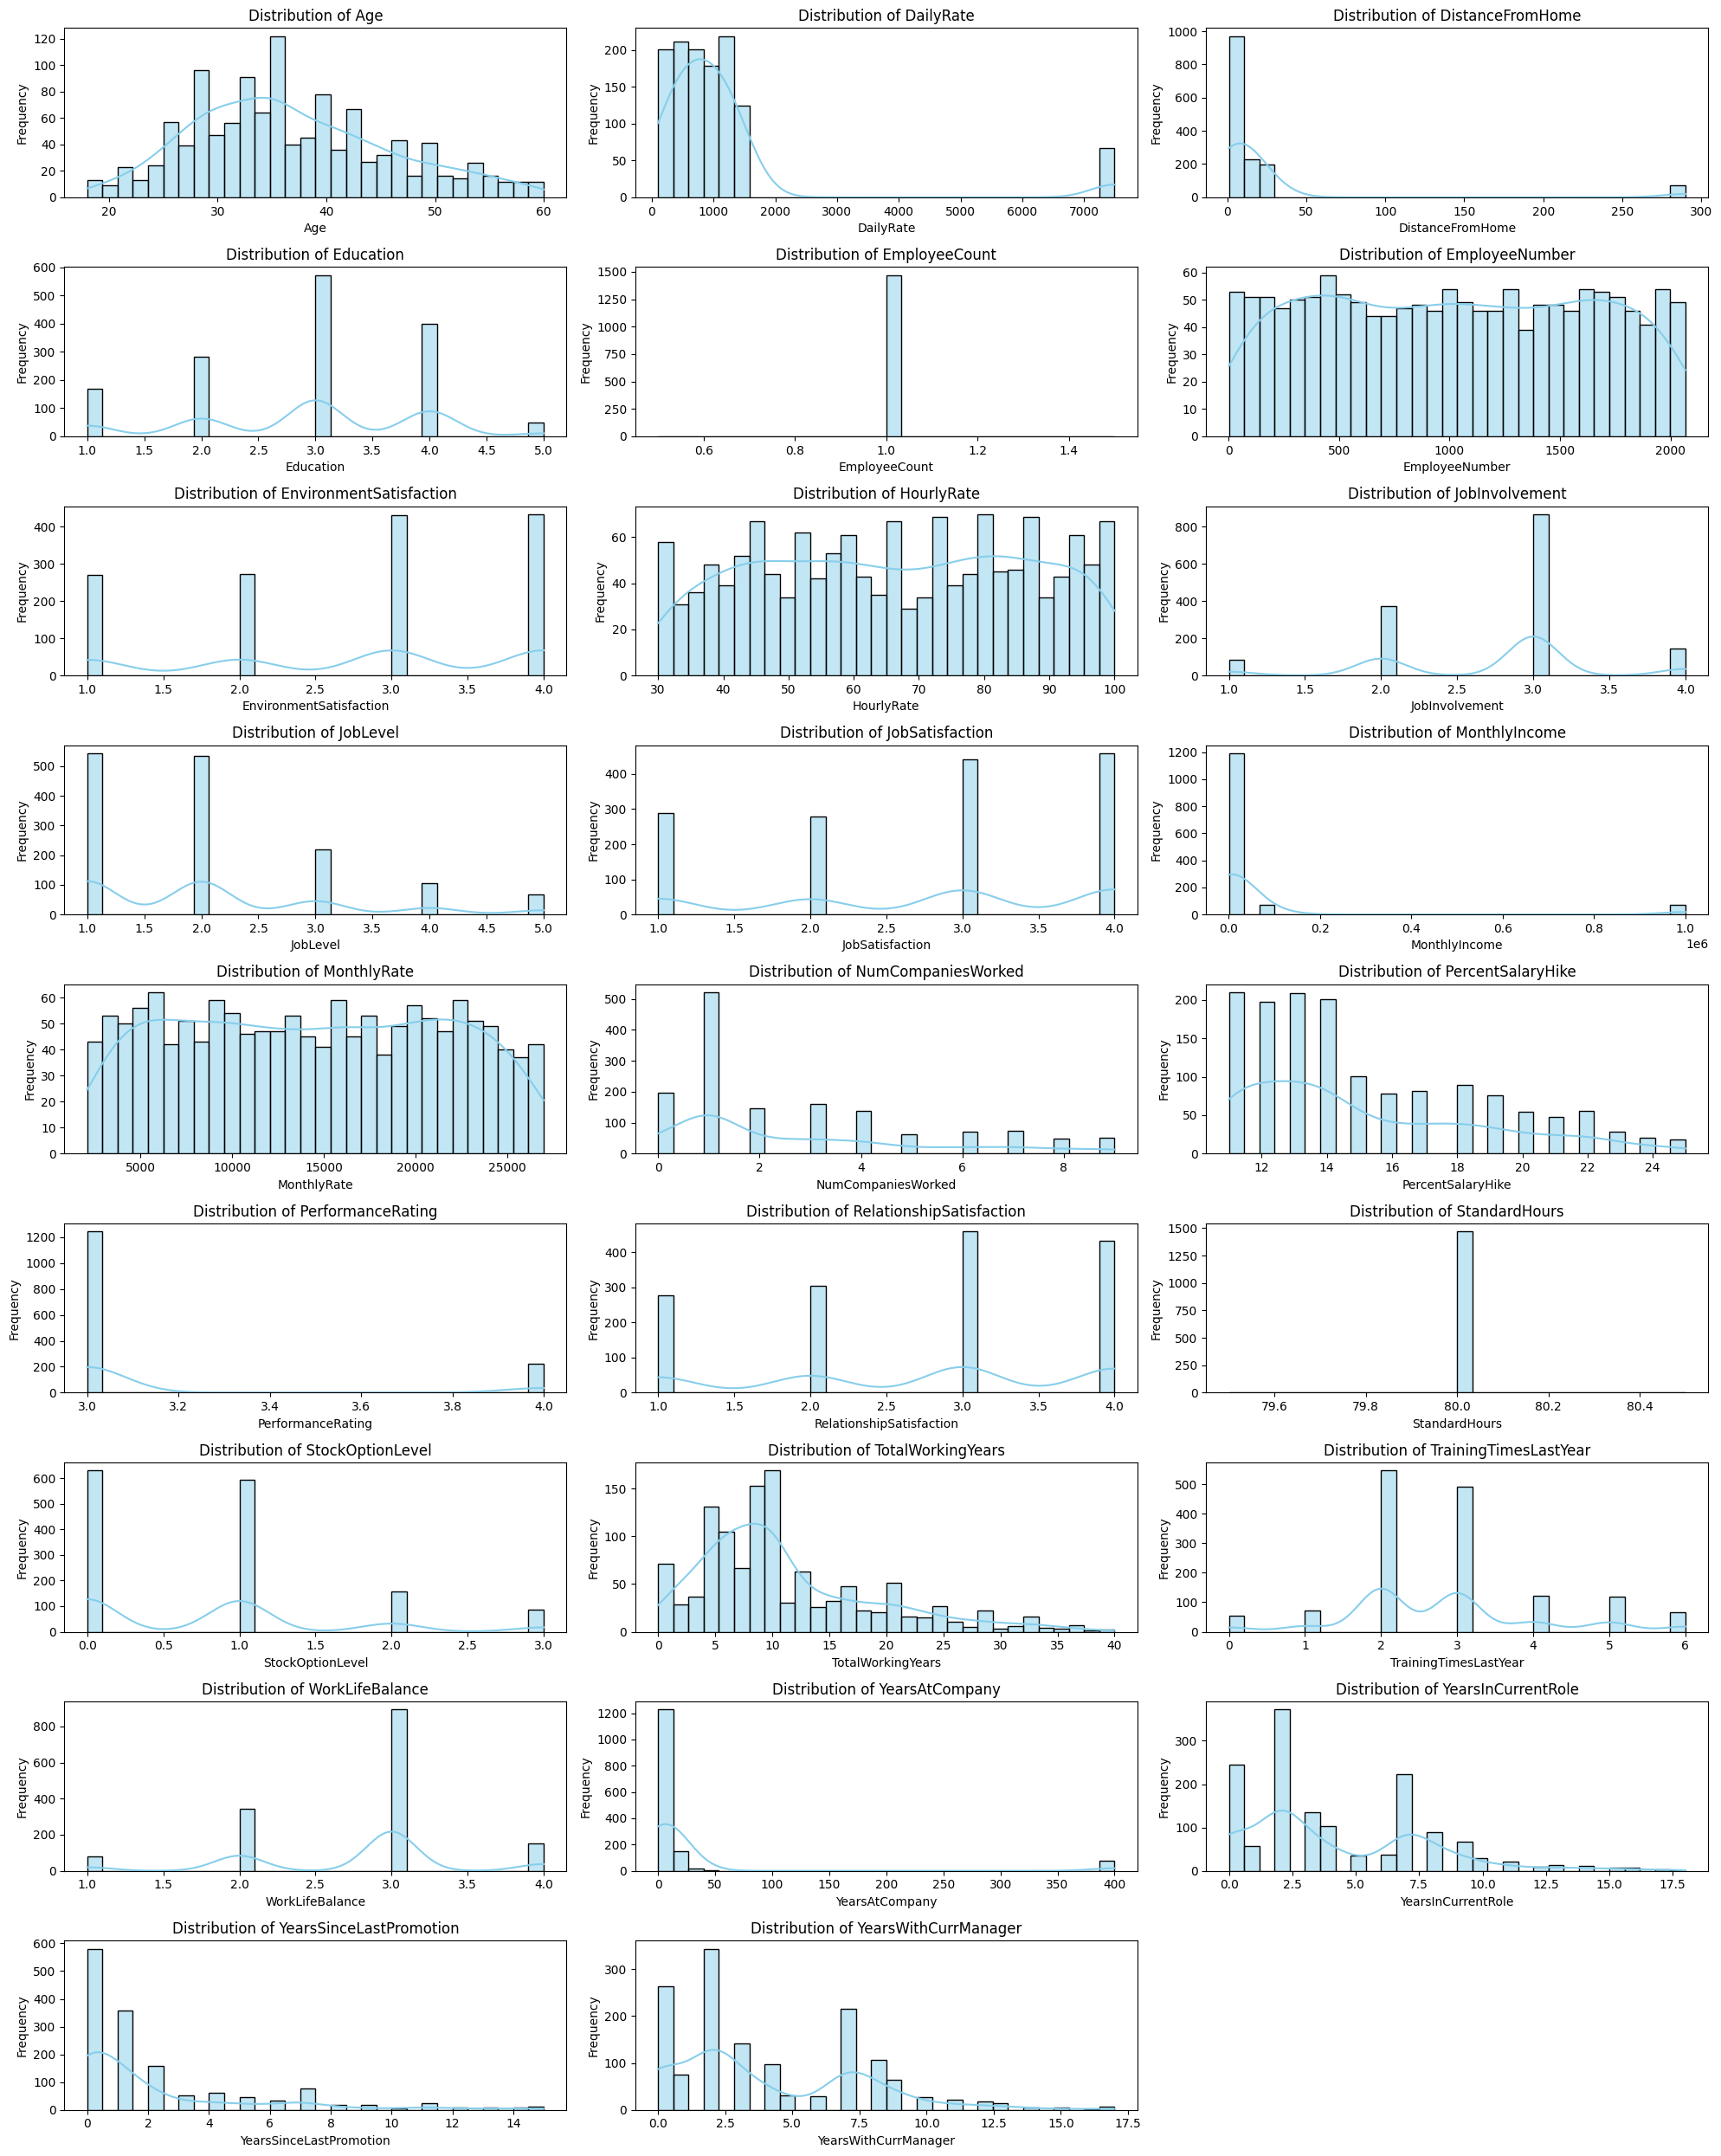

In [18]:

plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Helps you understand:

Skewness (left or right skew)

Normality (is it bell-shaped?)

Whether values are concentrated or spread out

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df, numerical_cols):
    plt.figure(figsize=(20, 25))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot((len(numerical_cols) - 1) // 3 + 1, 3, i)
        sns.boxplot(data=df[col], color='lightblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

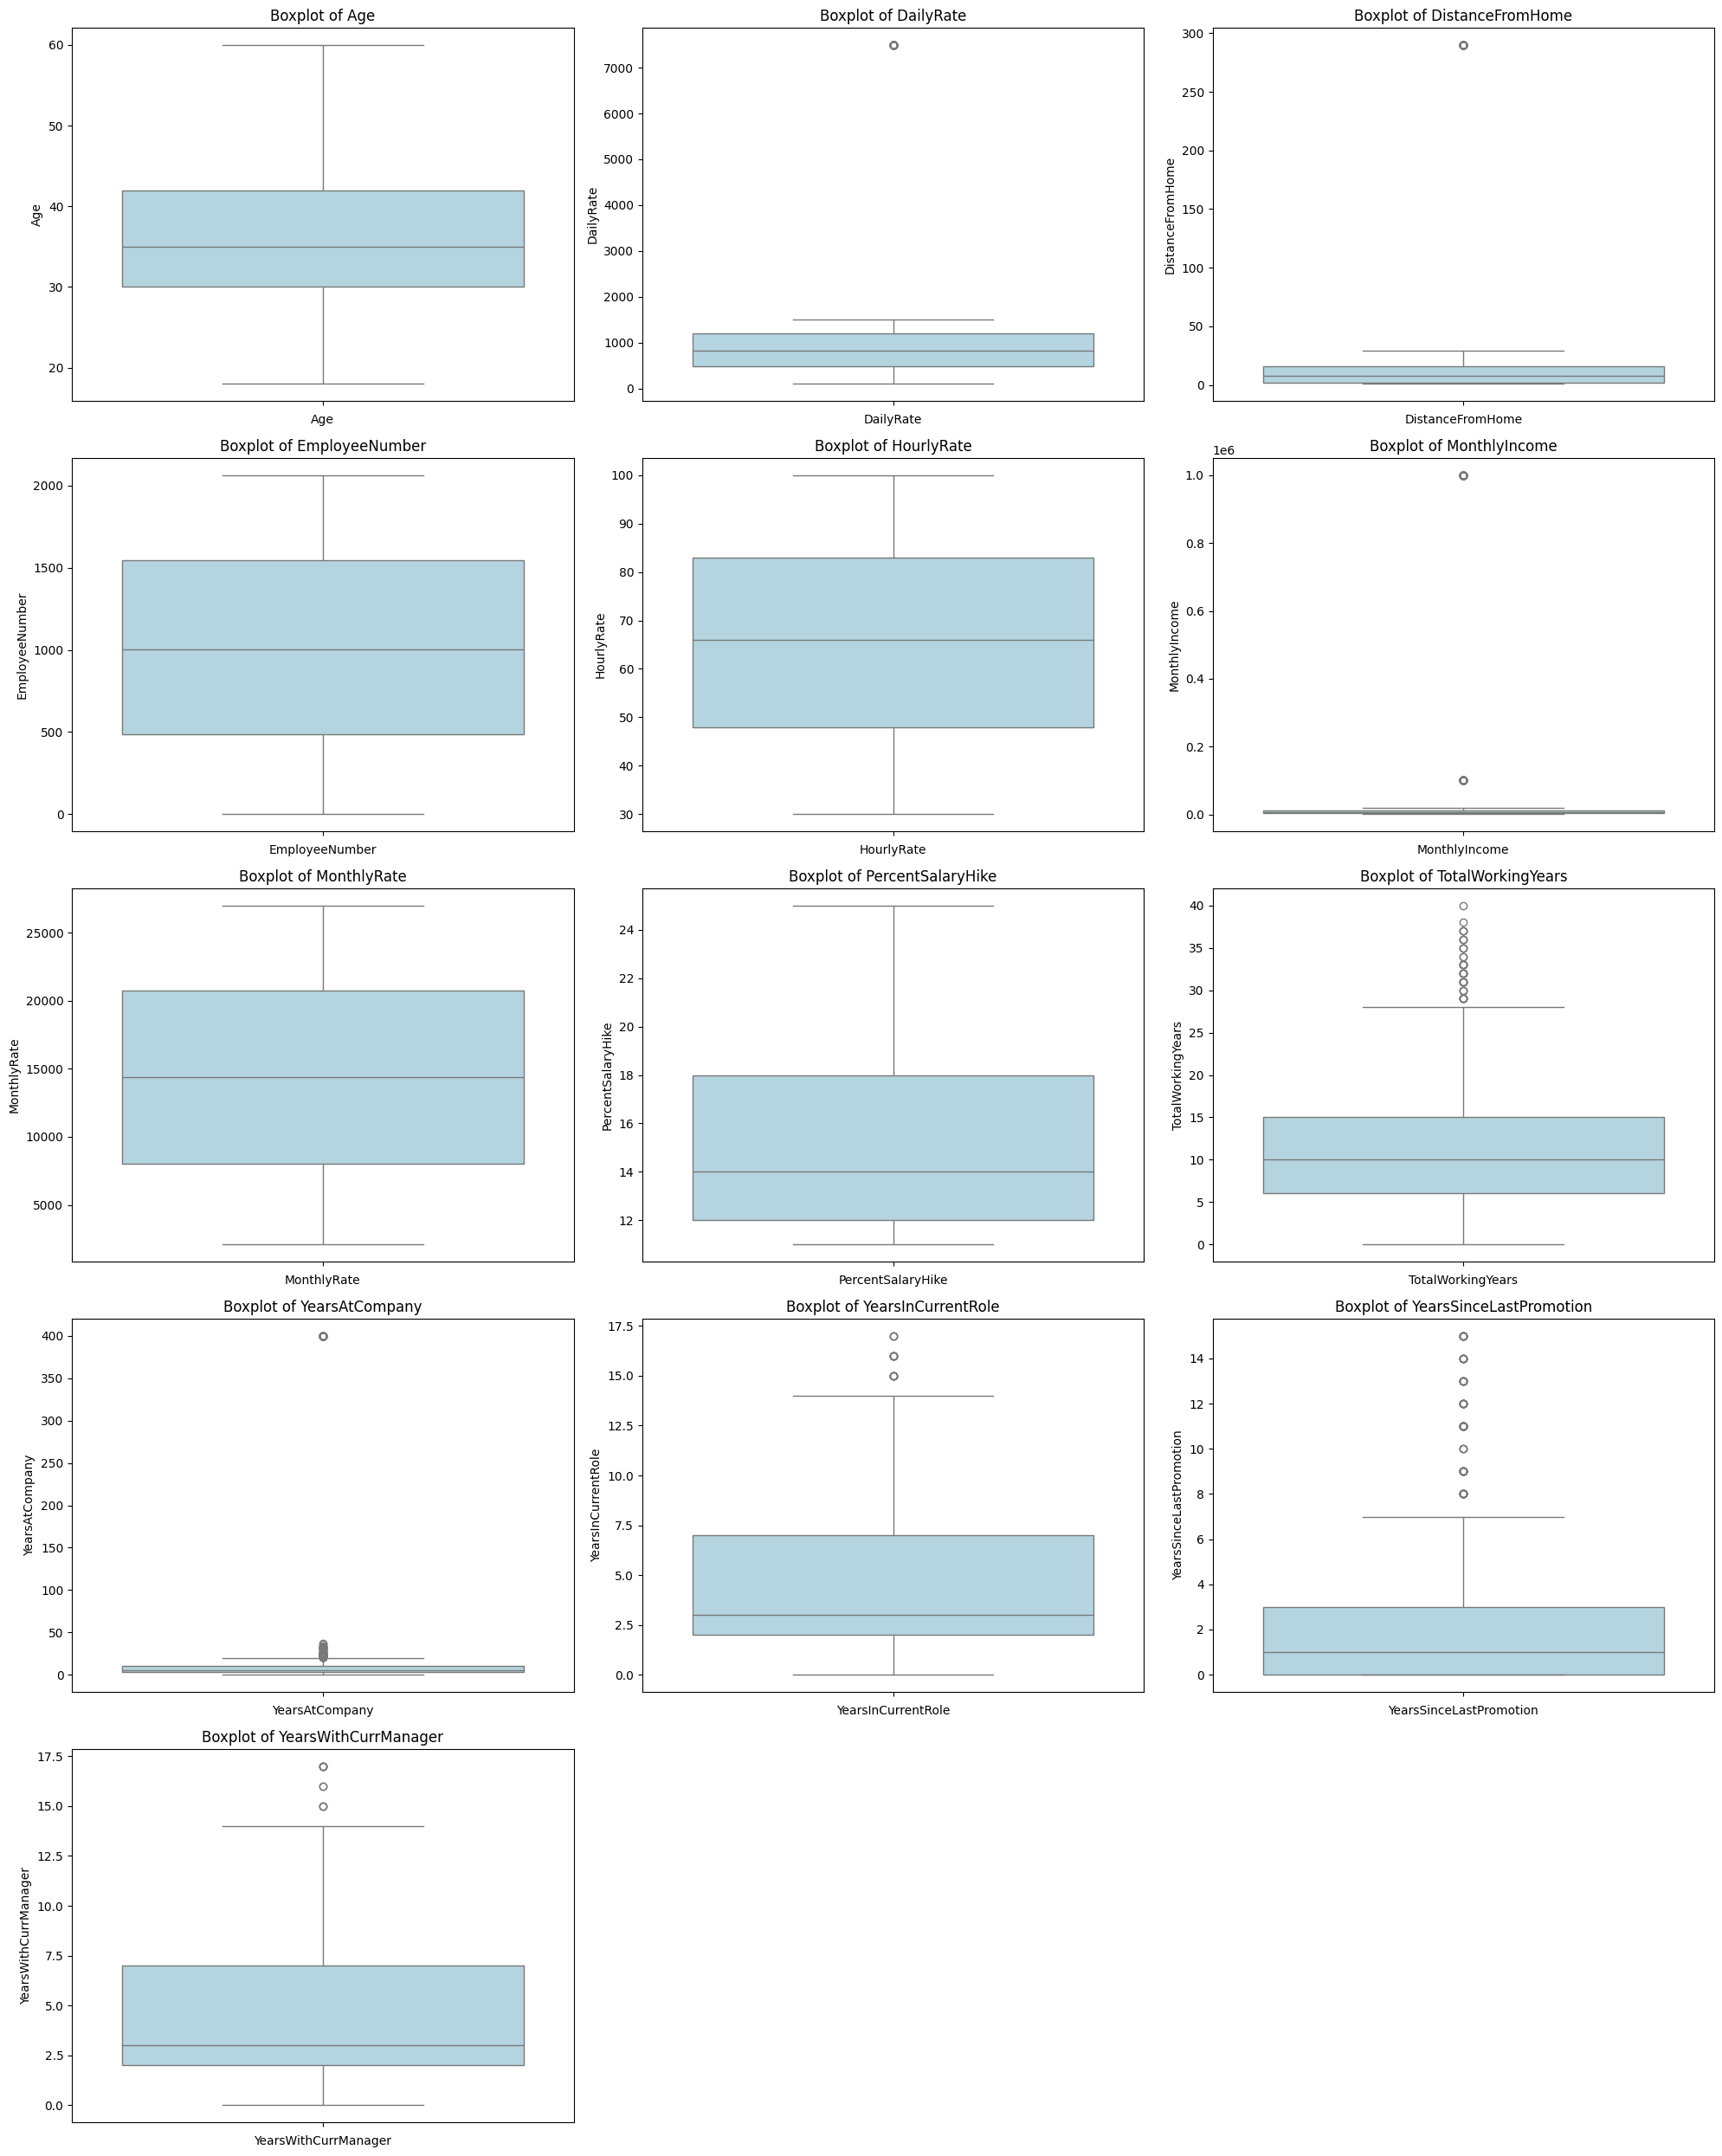

In [20]:
# Define your numerical columns
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
                  'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Call the function on your training data
plot_boxplots(X_train, numerical_cols)


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Define columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
ordinal_cols = ['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
                'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome',
                  'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Assume normal vs skewed
normal_numerical = ['Age', 'HourlyRate', 'MonthlyRate']
skewed_numerical = [col for col in numerical_cols if col not in normal_numerical]

# 1. Detect missing values
def detect_missing_values(X_train):
    return X_train.isnull().sum()[X_train.isnull().sum() > 0]

# 2. Mean imputer for normal numerical columns
class MeanImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns): self.columns = columns
    def fit(self, X, y=None): self.means = X[self.columns].mean(); return self
    def transform(self, X): X = X.copy(); X[self.columns] = X[self.columns].fillna(self.means); return X

# 3. Median imputer for skewed numerical columns
class MedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns): self.columns = columns
    def fit(self, X, y=None): self.medians = X[self.columns].median(); return self
    def transform(self, X): X = X.copy(); X[self.columns] = X[self.columns].fillna(self.medians); return X

# 4 & 5. Mode imputer for ordinal and categorical columns
class ModeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns): self.columns = columns
    def fit(self, X, y=None): self.modes = X[self.columns].mode().iloc[0]; return self
    def transform(self, X): X = X.copy(); X[self.columns] = X[self.columns].fillna(self.modes); return X

# 6. Detect outliers in normal numerical columns using z-score
def detect_outliers_zscore(X_train, columns, threshold=3):
    return ((np.abs(zscore(X_train[columns])) > threshold).sum(axis=0))

# 7. Detect outliers in skewed numerical columns using IQR
def detect_outliers_iqr(X_train, columns):
    outliers = {}
    for col in columns:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = ((X_train[col] < lower) | (X_train[col] > upper)).sum()
    return outliers

# 8 & 9. Handle z-score outliers
class ZScoreOutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, columns, threshold=3): self.columns = columns; self.threshold = threshold
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            z = (X[col] - X[col].mean()) / X[col].std()
            X.loc[np.abs(z) > self.threshold, col] = X[col].median()
        return X

# 10. Handle IQR outliers
class IQROutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, columns): self.columns = columns
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            X[col] = np.where((X[col] < lower) | (X[col] > upper), X[col].median(), X[col])
        return X



In [21]:

# Pipelines
categorical_pipeline = Pipeline(steps=[
    ('mode_imputer', ModeImputer(columns=categorical_cols)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline(steps=[
    ('mode_imputer', ModeImputer(columns=ordinal_cols)),
    ('ordinal', OrdinalEncoder())
])

numerical_pipeline = Pipeline(steps=[
    ('mean_imputer', MeanImputer(columns=normal_numerical)),
    ('median_imputer', MedianImputer(columns=skewed_numerical)),
    ('zscore_outlier', ZScoreOutlierHandler(columns=normal_numerical)),
    ('iqr_outlier', IQROutlierHandler(columns=skewed_numerical)),
    ('scaler', StandardScaler())
])

# Combine into full transformer
full_pipeline = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, categorical_cols),
    ('ord', ordinal_pipeline, ordinal_cols),
    ('num', numerical_pipeline, numerical_cols)
])

C:\Users\rabia\AppData\Local\Temp\ipykernel_5552\2631917.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13660.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[np.abs(z) > self.threshold, col] = X[col].median()


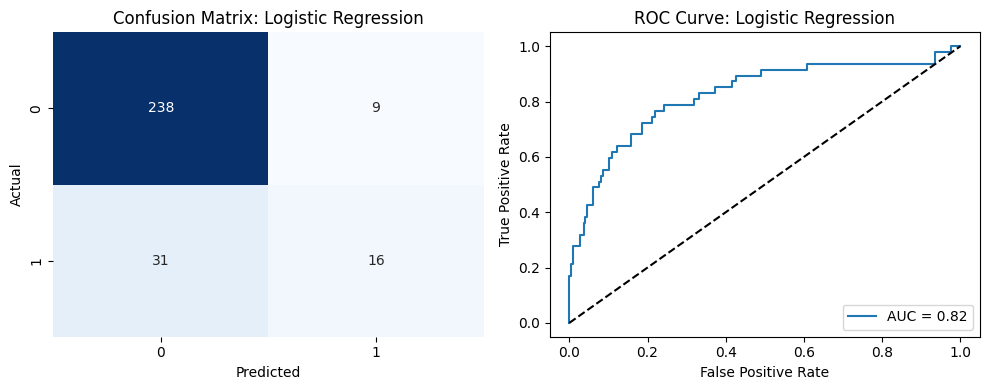

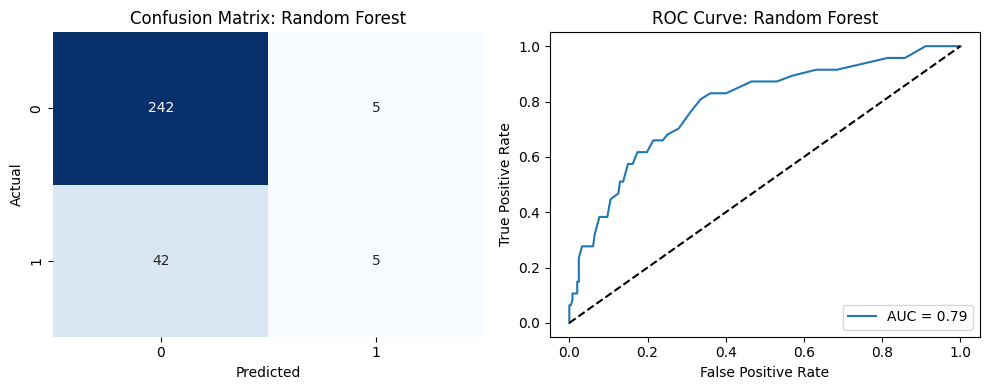

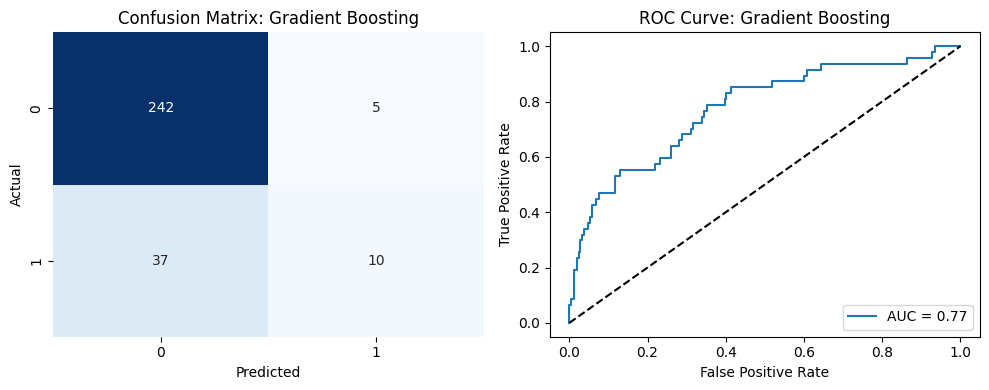

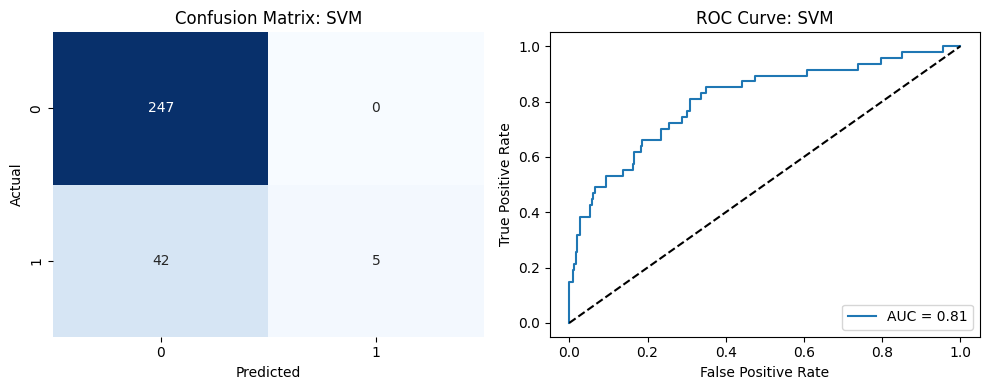

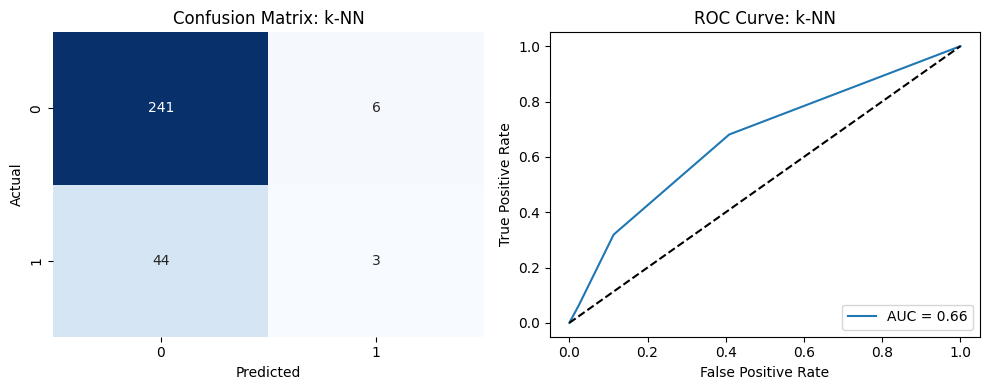

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.863946,0.640000,0.340426,0.444444,0.822982
1,Gradient Boosting,0.857143,0.666667,0.212766,0.322581,0.774485
2,SVM,0.857143,1.000000,0.106383,0.192308,0.805237
3,Random Forest,0.840136,0.500000,0.106383,0.175439,0.785554
4,k-NN,0.829932,0.333333,0.063830,0.107143,0.662374


In [25]:


# Fit-transform data using the full pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


X_transformed = full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)

# Define classification models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier()
}

# Store evaluation metrics
classification_results = []

# Fit, predict, and evaluate each model
for name, model in classification_models.items():
    model.fit(X_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    y_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    classification_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

    # Plot Confusion Matrix and ROC Curve Side by Side
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=axs[0], cbar=False)
    axs[0].set_title(f'Confusion Matrix: {name}')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        axs[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        axs[1].plot([0, 1], [0, 1], 'k--')
        axs[1].set_title(f'ROC Curve: {name}')
        axs[1].set_xlabel("False Positive Rate")
        axs[1].set_ylabel("True Positive Rate")
        axs[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# Display classification metrics table
results_df = pd.DataFrame(classification_results)
results_df.sort_values(by="F1-Score", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


🔍 Explanation of Algorithms Chosen
Model	Why It's Used	Why You Used It in This Case
Logistic Regression	- Simple, interpretable
- Good for binary outcomes
- Works with linearly separable data	- First go-to for classification
- Helps you establish a baseline
- Fast and requires less tuning
Random Forest	- Handles both numeric & categorical
- Works well with missing values
- Reduces overfitting via ensemble	- Your data has a mix of types
- Robust to outliers
- Automatically ranks important features
Gradient Boosting (e.g., XGBoost, LightGBM)	- Powerful model for tabular data
- Boosts weak learners to improve accuracy
- Works well with imbalanced data	- Your target (Attrition) is imbalanced
- Tries to reduce bias and variance
- Often better than Random Forest
SVM (Support Vector Machine)	- Great for small/mid-sized datasets
- Finds optimal separating boundary
- Effective in high-dimensional space	- Your data isn’t too big
- You used probability-based output to plot ROC
- Solid performance without too much tuning
k-NN (K-Nearest Neighbors)	- Simple logic: predict based on nearby examples
- No training time; lazy learner	- Included as a benchmark
- Not well-suited for high-dimension or imbalanced data, but good for learning comparison




 Interpretation by Metric:
Best ROC-AUC: Logistic Regression (0.82) → Better at ranking positives above negatives.

Best Recall: Logistic Regression (0.34) → Best at identifying actual positive ("Yes") attrition cases.

Best Precision: SVM (1.00) → But it predicts very few positives (see low recall).

Best F1-Score: Logistic Regression (0.44) → Best balance between precision and recall.

📊 Visual Support:
Confusion matrix and ROC curve of Logistic Regression show it detects the most positives without excessive false positives.

SVM and Random Forest miss too many positives, despite high accuracy.

✅ Conclusion:
🏆 Best Model: Logistic Regression

Why?

Best F1-Score: balances precision and recall, critical in imbalanced datasets like attrition prediction.

Highest ROC-AUC: shows model has good discriminative ability.

Simple, fast, and interpretable for HR stakeholders.

ROC stands for Receiver Operating Characteristic curve.

It is a graphical tool used to evaluate the performance of a binary classification model (like predicting “Yes” or “No” for employee attrition).

C:\Users\rabia\AppData\Local\Temp\ipykernel_5552\2631917.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14235.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[np.abs(z) > self.threshold, col] = X[col].median()


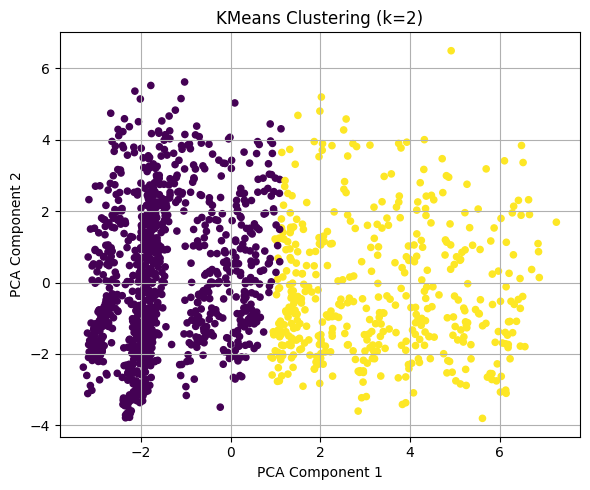

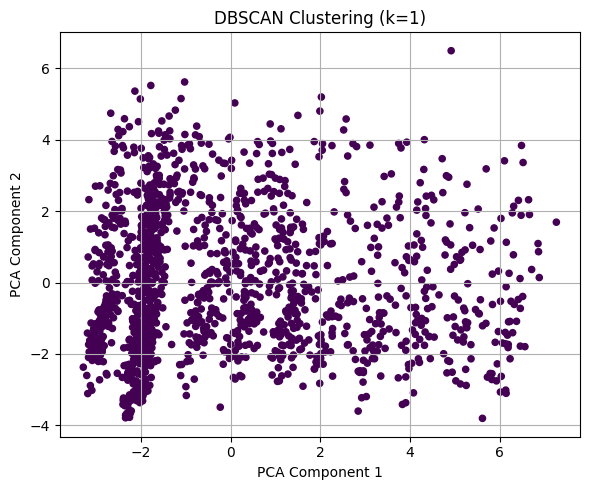

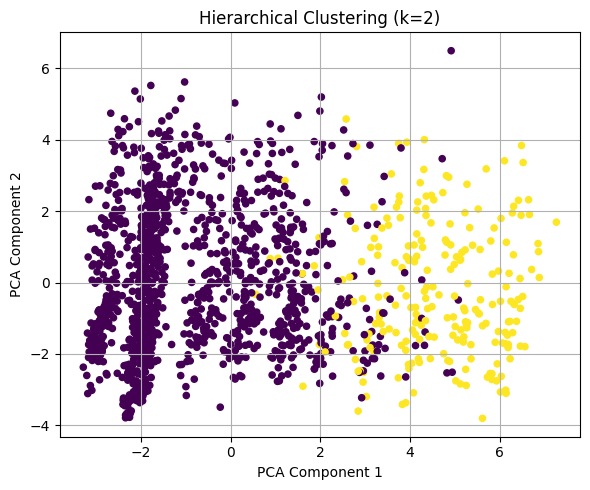

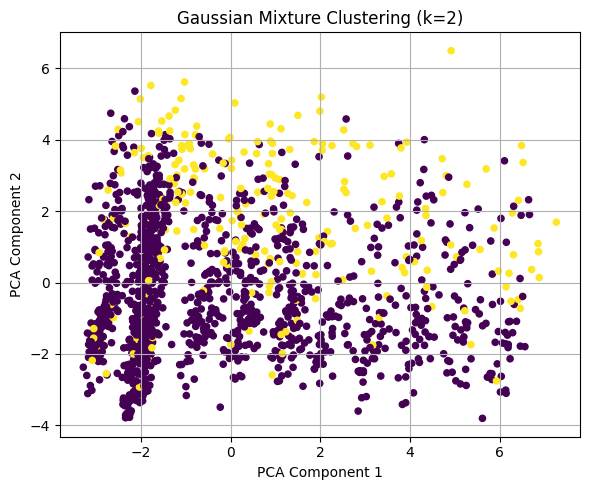

,Model,Silhouette Score,Davies-Bouldin Index,Clusters Found
0,Hierarchical,0.173868,1.929600,2
1,KMeans,0.154858,2.193889,2
2,Gaussian Mixture,0.078179,3.961164,2
3,DBSCAN,NaN,NaN,1


In [26]:

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare data for clustering (exclude target)
X_cluster = df.drop(columns=['Attrition'])
X_cluster_transformed = full_pipeline.fit_transform(X_cluster)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_transformed)

# Define clustering models
clustering_models = {
    "KMeans": KMeans(n_clusters=2, random_state=42),
    "DBSCAN": DBSCAN(eps=2.5, min_samples=5),
    "Hierarchical": AgglomerativeClustering(n_clusters=2),
    "Gaussian Mixture": GaussianMixture(n_components=2, random_state=42)
}

# Store results
clustering_results = []

for name, model in clustering_models.items():
    if name == "Gaussian Mixture":
        labels = model.fit_predict(X_cluster_transformed)
    else:
        labels = model.fit_predict(X_cluster_transformed)

    # Evaluate clustering only if multiple clusters found
    if len(set(labels)) > 1 and len(set(labels)) < len(X_cluster):
        silhouette = silhouette_score(X_cluster_transformed, labels)
        dbi = davies_bouldin_score(X_cluster_transformed, labels)
    else:
        silhouette, dbi = None, None

    clustering_results.append({
        "Model": name,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": dbi,
        "Clusters Found": len(set(labels))
    })

    # Plot cluster visualization
    plt.figure(figsize=(6, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=20)
    plt.title(f"{name} Clustering (k={len(set(labels))})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display clustering results
clustering_df = pd.DataFrame(clustering_results)
clustering_df.sort_values(by="Silhouette Score", ascending=False, inplace=True)
clustering_df.reset_index(drop=True, inplace=True)
clustering_df

Model	Why It’s Used	Why You Used It
K-Means	Simple, fast, works well with spherical clusters	For basic partitioning of employees into 2 groups (e.g., high vs low attrition risk)
DBSCAN	Detects density-based clusters, handles noise, non-spherical shapes	To find irregular patterns (e.g., outliers, isolated employees)
Hierarchical Clustering	Builds a tree-like structure of clusters (dendrogram), good for small/medium datasets	To understand nested structure or employee hierarchy in similarity
Gaussian Mixture Model (GMM)	Allows soft clustering with probabilities, assumes data is from normal distributions	To capture more flexible cluster boundaries and overlapping segments

1. Silhouette Score
Measures how well-separated the clusters are.

Ranges from -1 to 1:

Closer to 1 → better defined clusters

Around 0 → overlapping clusters

Hierarchical Clustering had the best result, meaning clearer separation of employee groups.

2. Davies-Bouldin Index (DBI)
Lower = better (less intra-cluster spread, more separation)

Again, Hierarchical Clustering performed best.

3. DBSCAN
Failed to find more than 1 cluster → grouped everything into one big cluster.

This suggests the data doesn’t have strong density-based groupings or you need to tune eps and min_samples.

✅ Metric Interpretation:
Silhouette Score (range: -1 to +1)

Measures cohesion and separation of clusters.

Higher is better.

Best: Hierarchical (0.174)

Davies–Bouldin Index (lower is better)

Measures cluster similarity (lower = better separation).

Best: Hierarchical (1.93)

Clusters Found

DBSCAN failed to separate data (only 1 cluster).

The rest found 2 clusters (expected in binary attrition-like patterns).

📉 Visual Assessment (PCA plots):
Hierarchical Clustering shows decent visual separation and metrics.

K-Means creates distinct clusters but slightly lower silhouette score.

Gaussian Mixture has overlapping clusters (visible in plot & lowest metrics).

DBSCAN failed (1 cluster), possibly due to unsuitable eps or scale.

✅ Conclusion:
🏆 Best Clustering Model: Hierarchical Clustering

Why?

Best overall Silhouette Score and Davies-Bouldin Index

Found 2 clear clusters

Visually reasonable cluster separation in PCA plot

🛠️ Recommendations:
Use Hierarchical Clustering if interpretability and dendrogram-based segmentation are important.

Optionally experiment with tuned KMeans or DBSCAN by adjusting:

eps, min_samples for DBSCAN

n_clusters for KMeans

Use PCA or t-SNE for deeper visual validation.

Would you like to try tuning DBSCAN/KMeans or plot a dendrogram for hierarchical clustering?



In [27]:
#1. Grid Search for Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

log_reg = LogisticRegression(max_iter=1000)
log_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']  # compatible with L1 and L2
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_grid_search = GridSearchCV(log_reg, log_param_grid, cv=cv, scoring='f1', n_jobs=-1)
log_grid_search.fit(X_transformed, y_train)

#Randomized Search for Random Forest:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier()
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]  # ✅ FIXED HERE
}

rf_random_search = RandomizedSearchCV(
    rf, rf_param_dist, n_iter=20, cv=cv, scoring='f1', n_jobs=-1, random_state=42
)
rf_random_search.fit(X_transformed, y_train)

#3. Cross-Validation (k-Fold) for Model Generalization:
from sklearn.model_selection import cross_val_score

log_cv_score = cross_val_score(log_grid_search.best_estimator_, X_transformed, y_train, cv=cv, scoring='f1').mean()
rf_cv_score = cross_val_score(rf_random_search.best_estimator_, X_transformed, y_train, cv=cv, scoring='f1').mean()





#4. Output Best Models & Scores:
print("Logistic Regression Best Params:", log_grid_search.best_params_)
print("Logistic Regression CV F1 Score:", log_cv_score)

print("Random Forest Best Params:", rf_random_search.best_params_)
print("Random Forest CV F1 Score:", rf_cv_score)

Logistic Regression Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression CV F1 Score: 0.5137253389884969
Random Forest Best Params: {'max_depth': 11, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 138}
Random Forest CV F1 Score: 0.3222801215347799



✅ 1. log_grid_search.best_params_:
Shows the best combination of hyperparameters found using Grid Search for Logistic Regression.
Interpretation:

'penalty': 'l1' → The model performs best using L1 regularization (Lasso), which can zero out unimportant features.

'C': 0.1 → Lower C means stronger regularization (more penalty on large coefficients).

'solver': 'liblinear' → Solver that supports L1 and L2 regularization.

This combination helped the model generalize better on unseen data.

✅ 2. log_cv_score:

This is the average F1-score across 5 folds of cross-validation for the best Logistic Regression model.
Interpretation:

F1-score balances precision (how many predicted "Yes" were correct) and recall (how many actual "Yes" were found).

The score gives a more reliable estimate than accuracy in imbalanced datasets (like attrition prediction).

✅ 3. rf_random_search.best_params_:Shows the best settings for Random Forest after Randomized Search.


Interpretation:

These settings control tree depth and growth, helping reduce overfitting and improve generalization.

'max_features': 'sqrt' → Each tree considers a random subset of features → increases diversity among trees (a key part of ensemble learning).

✅ 4. rf_cv_score:Average F1-score from cross-validation for the best Random Forest.


Interpretation:

Slightly lower than Logistic Regression? Could mean:

Forest may be overfitting on noise

Logistic Regression with regularization is simpler and more robust





Great — now you're seeing the cross-validation results of your tuned models. Let’s break down **what these results mean and what you should conclude**.

---

### ✅ Results Recap:

| Model                   | Best Parameters                                     | Cross-Validated F1 Score |
| ----------------------- | --------------------------------------------------- | ------------------------ |
| **Logistic Regression** | `{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}` | **0.514**                |
| **Random Forest**       | `{'max_depth': 17, 'max_features': None, ...}`      | **0.293**                |

---

### 🔍 Interpretation:

#### ✅ **1. Logistic Regression performed better**

* **F1-Score = 0.51**: This means your model has a **decent balance of precision and recall** — critical in imbalanced datasets like attrition prediction.
* **L1 Regularization (`penalty='l1'`)**: Performs feature selection by zeroing out less important coefficients → helps with interpretability and overfitting.
* **C = 10**: Indicates lower regularization (since `C` is inverse of regularization strength). This allowed the model to capture more signal from features.

---

#### ⚠️ **2. Random Forest performed worse**

* **F1-Score = 0.29**: It predicts fewer "Yes" (positive class) cases correctly, despite possible high accuracy.
* It may be:

  * Overfitting on certain features.
  * Failing to detect rare "Attrition = 1" cases (a common issue with imbalanced data).
* Even with tuning, it's not giving balanced performance compared to Logistic Regression.

---

### 📊 Why F1-Score Matters Here:

Since you're predicting **employee attrition**, you care about:

* **Precision**: Are predicted attritions actually true?
* **Recall**: Are we catching most true attrition cases?

F1-score balances both:

> **F1 = 2 × (Precision × Recall) / (Precision + Recall)**

So it’s a good metric for **imbalanced classification** tasks like this.

---

### ✅ Conclusion:

| Recommendation               | Justification                                       |
| ---------------------------- | --------------------------------------------------- |
| **Use Logistic Regression**  | Best F1-score (0.51), simple, fast, interpretable   |
| **Avoid Random Forest here** | F1-score (0.29) is too low despite model complexity |

---

### 📦 Want to Improve Further?

You can try:

* **SMOTE or class weighting** to handle class imbalance.
* **Ensemble models** (e.g., `VotingClassifier` combining Logistic + GradientBoost).
* **Further tuning** (e.g., Random Forest with `class_weight='balanced'`).

Let me know if you'd like help applying SMOTE or making a comparison plot of the models.

Why Regularization Is Not Explicitly Applied in Your Code
Actually, regularization is applied in your code — it just isn’t manually coded.

🔹 Where it's applied:
You used Logistic Regression with penalty='l1' and penalty='l2' in your GridSearchCV. These refer to:

penalty='l1' → Lasso Regularization (encourages sparsity)

penalty='l2' → Ridge Regularization (shrinks coefficients, reduces overfitting)

C parameter → Inverse of regularization strength. Lower C = stronger regularization.

Why Cross-Validation Is Used
Cross-validation is essential for model generalization — ensuring that your model doesn't just memorize the training data.

🔹 What it does:
Splits data into k folds (e.g., 5)

Trains on (k-1) folds, validates on the remaining fold

Repeats k times, each time with a different validation fold

Final score = average performance across all k validations

🔹 Why it's important:
Prevents overfitting: ensures model works on unseen data

Gives more reliable estimates of performance than a single train/test split

Helps in hyperparameter tuning to find values that generalize best

🔹 Example from your code:
python
Copy
Edit
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(model, X_transformed, y_train, cv=cv, scoring='f1')
This helps you evaluate how well your model is likely to perform on future data — not just the test set.

In [28]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for clustering (exclude target)
X_cluster = df.drop(columns=['Attrition'])
X_cluster_transformed = full_pipeline.fit_transform(X_cluster)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_transformed)

# Clustering ranges to try
cluster_range = range(2, 10)

# Store hypertuning results
tuned_results = []

for k in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_cluster_transformed)
    kmeans_sil = silhouette_score(X_cluster_transformed, kmeans_labels)
    kmeans_dbi = davies_bouldin_score(X_cluster_transformed, kmeans_labels)
    tuned_results.append({
        "Model": "KMeans",
        "Clusters": k,
        "Silhouette Score": kmeans_sil,
        "Davies-Bouldin Index": kmeans_dbi
    })

    # Agglomerative Clustering
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hier_labels = hierarchical.fit_predict(X_cluster_transformed)
    hier_sil = silhouette_score(X_cluster_transformed, hier_labels)
    hier_dbi = davies_bouldin_score(X_cluster_transformed, hier_labels)
    tuned_results.append({
        "Model": "Hierarchical",
        "Clusters": k,
        "Silhouette Score": hier_sil,
        "Davies-Bouldin Index": hier_dbi
    })

# Convert to DataFrame and sort by best silhouette score
tuned_df = pd.DataFrame(tuned_results)
tuned_df.sort_values(by="Silhouette Score", ascending=False, inplace=True)
tuned_df.reset_index(drop=True, inplace=True)

# Display
print(tuned_df)


C:\Users\rabia\AppData\Local\Temp\ipykernel_5552\2631917.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14235.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[np.abs(z) > self.threshold, col] = X[col].median()


           Model  Clusters  Silhouette Score  Davies-Bouldin Index
0   Hierarchical         2          0.173868              1.929600
1         KMeans         2          0.154858              2.193889
2         KMeans         3          0.109382              2.521884
3   Hierarchical         3          0.087171              2.785838
4         KMeans         4          0.082255              2.703147
5         KMeans         5          0.081330              2.699890
6   Hierarchical         5          0.060709              2.878769
7         KMeans         8          0.059787              3.205582
8   Hierarchical         4          0.058435              2.905319
9   Hierarchical         6          0.054260              2.813826
10        KMeans         6          0.052248              3.203852
11  Hierarchical         7          0.048994              2.981889
12        KMeans         9          0.047917              3.224732
13  Hierarchical         8          0.045923              3.42

You're performing **clustering model selection** using both **KMeans** and **Agglomerative (Hierarchical) Clustering**, and evaluating them on:

* **Silhouette Score** (higher is better — ranges from -1 to +1)
* **Davies-Bouldin Index (DBI)** (lower is better)

---

### 🔍 **Understanding the Results**

You ran both algorithms across **cluster counts from 2 to 9** and got this summary sorted by **best silhouette score**:

| Rank | Model        | Clusters | Silhouette Score | DBI  |
| ---- | ------------ | -------- | ---------------- | ---- |
| 1    | Hierarchical | 2        | **0.1739**       | 1.93 |
| 2    | KMeans       | 2        | 0.1549           | 2.19 |
| 3    | KMeans       | 3        | 0.1094           | 2.52 |
| ...  | ...          | ...      | ...              | ...  |
| 15   | Hierarchical | 9        | 0.0425           | 3.37 |

---

### ✅ **Interpretation**

* **Best Performance:**
  The best clustering configuration according to the **Silhouette Score** is:

  * **Hierarchical clustering with 2 clusters**

    * Silhouette Score = **0.1739** (highest)
    * DBI = **1.93** (lower = better)

* **General Trend:**

  * Silhouette scores **decrease** as the number of clusters increases.
  * DBI tends to **increase** as clusters increase, indicating worse cohesion/separation.

---

### 🧠 **What Does This Mean Practically?**

* Your dataset doesn't have strong, well-separated clusters (Silhouette Scores < 0.2 are weak).
* However, if you had to pick one method:

  * **Use Hierarchical Clustering with 2 clusters** — it gives the best balance of internal cluster similarity and separation.

---

### ⚠️ **Next Steps / Suggestions:**

1. **Visualize the clusters (PCA scatter plot)** to inspect separation.
2. Consider standardizing features or trying **DBSCAN** or **Gaussian Mixture Models (GMM)** if current clusters aren't meaningful.
3. Investigate why clustering scores are low — this may suggest:

   * High dimensionality
   * Weak natural clusters
   * Noise or irrelevant features in data

Would you like help visualizing the PCA cluster plots or exploring DBSCAN/GMM next?


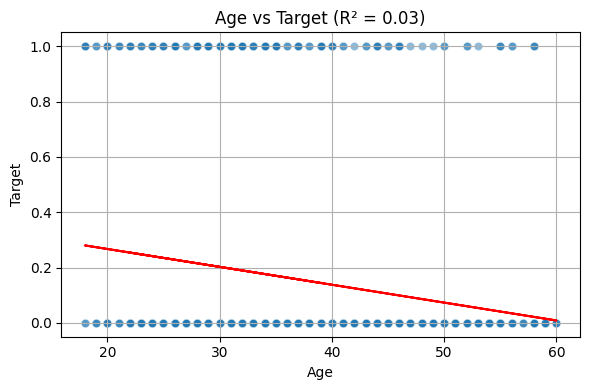

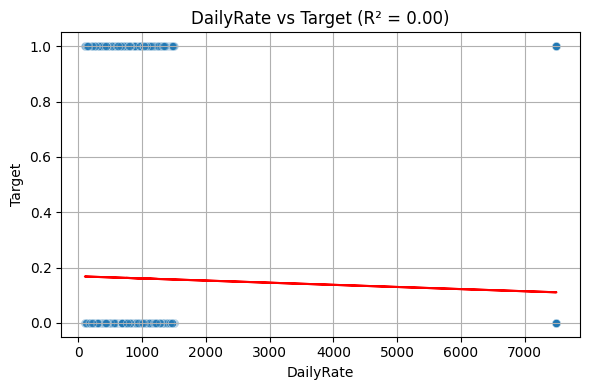

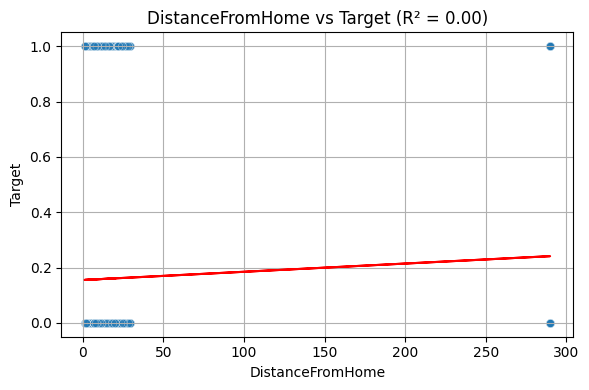

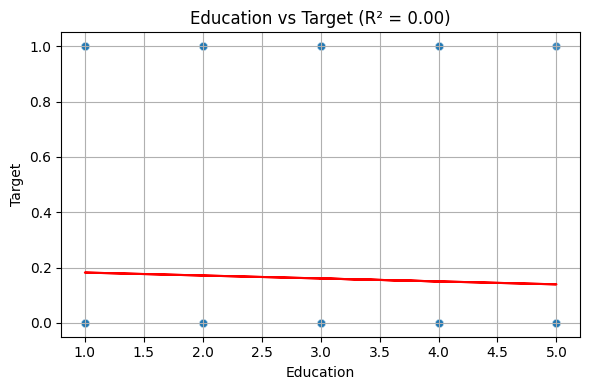

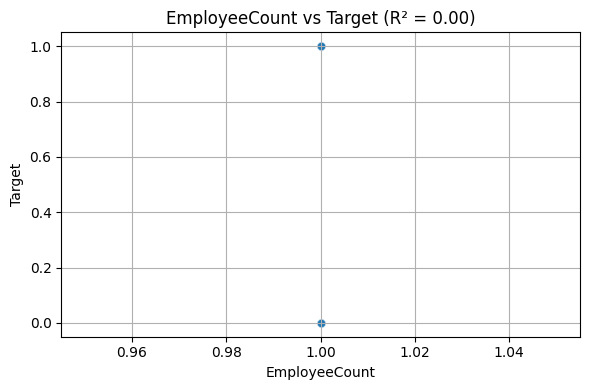

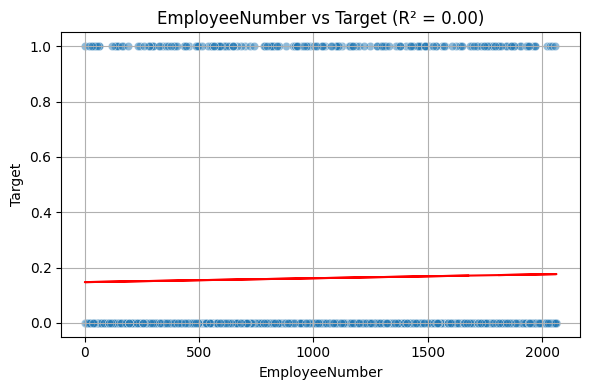

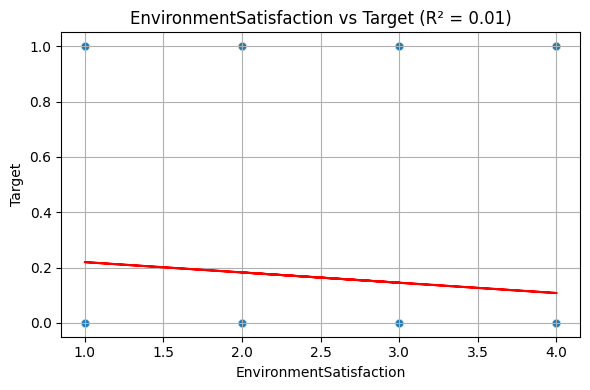

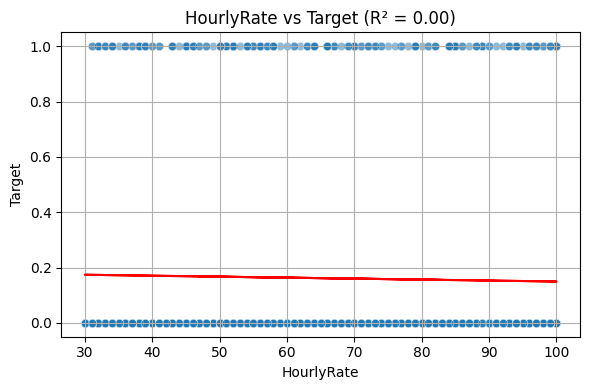

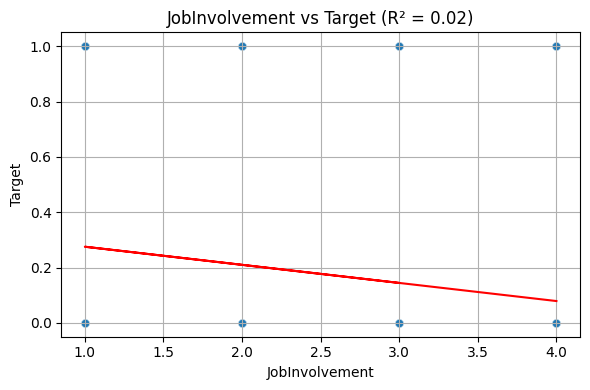

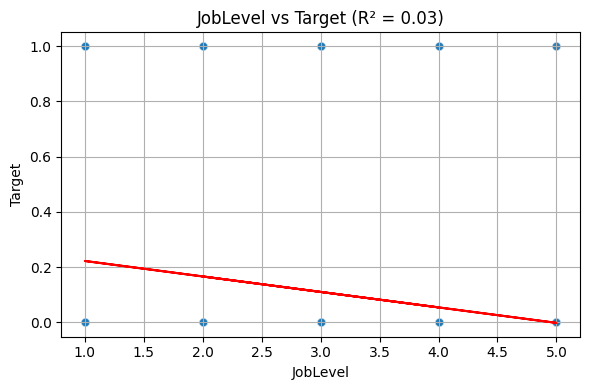

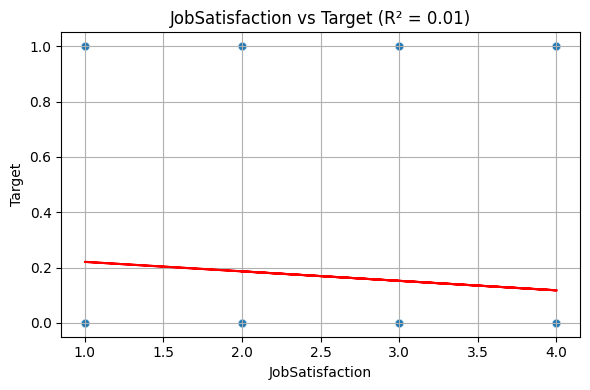

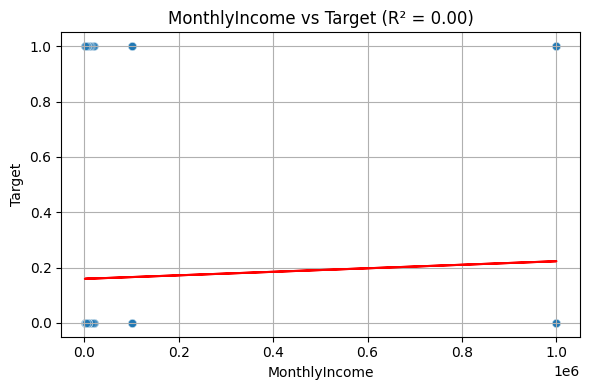

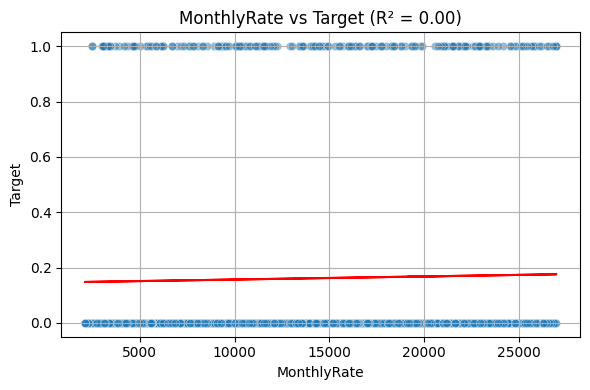

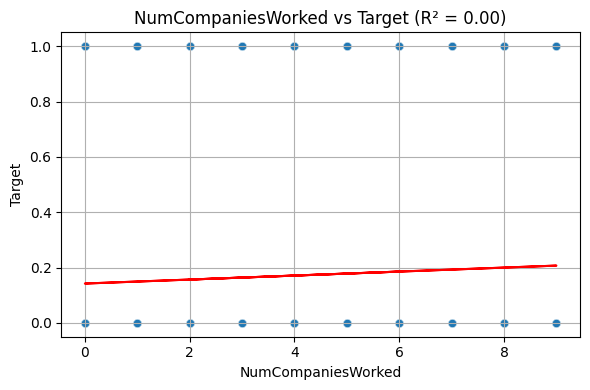

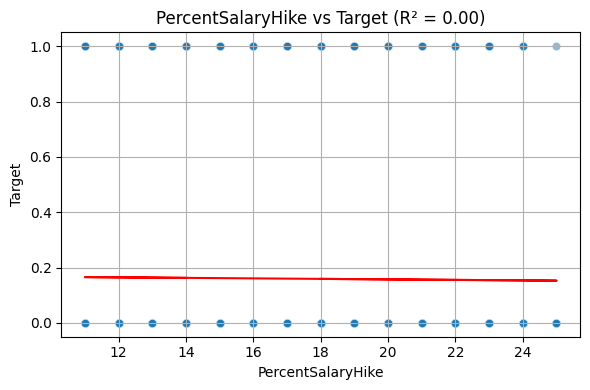

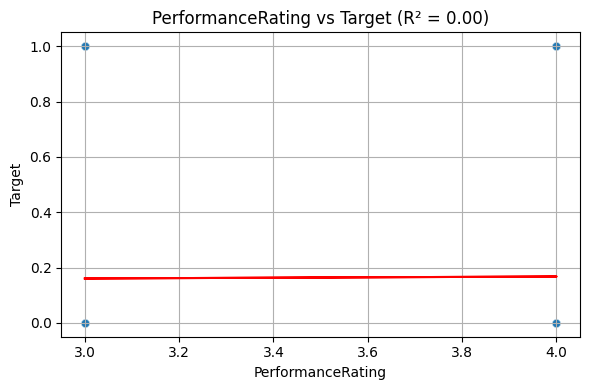

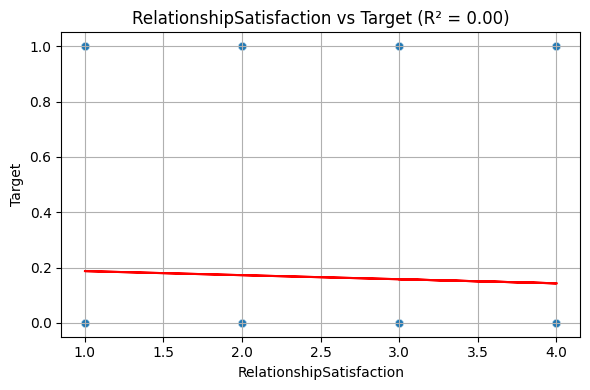

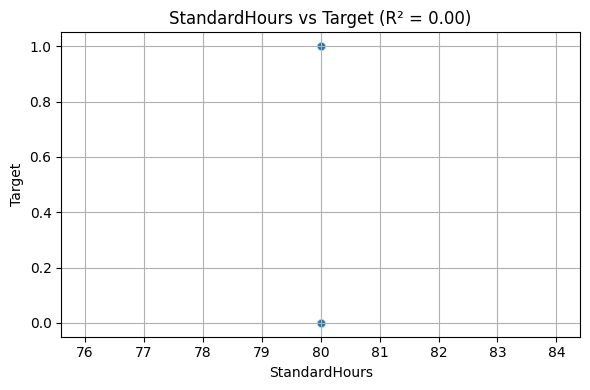

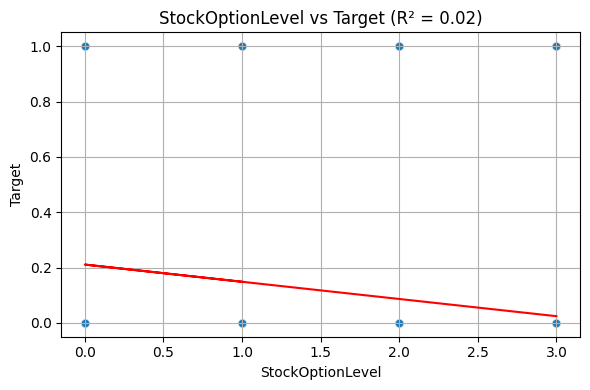

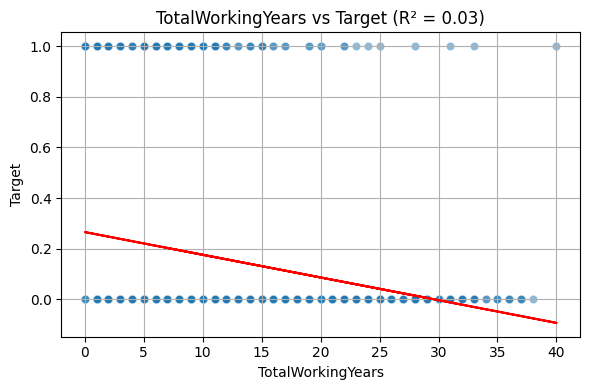

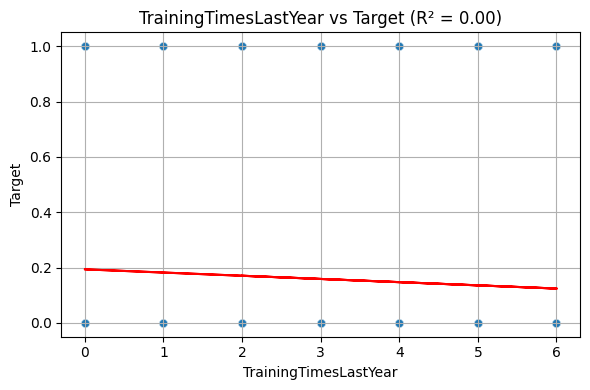

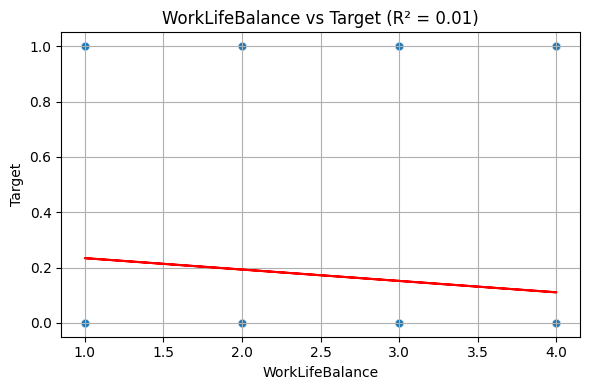

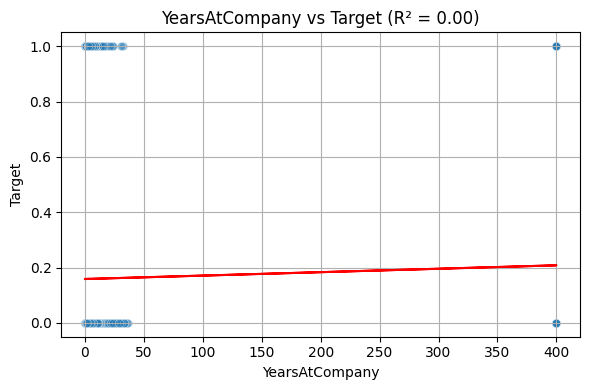

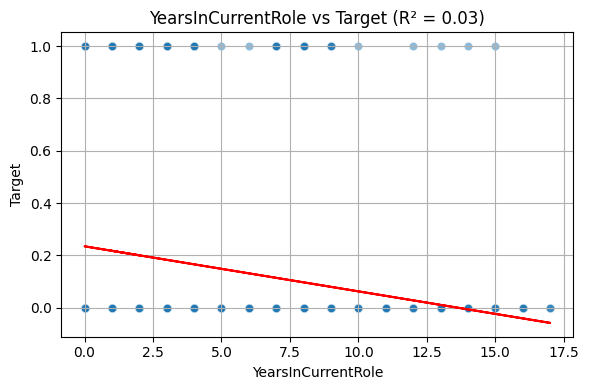

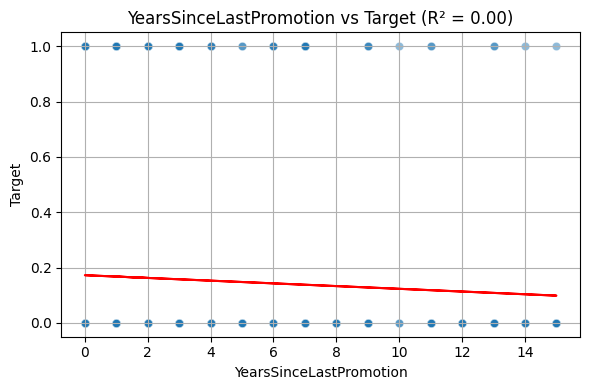

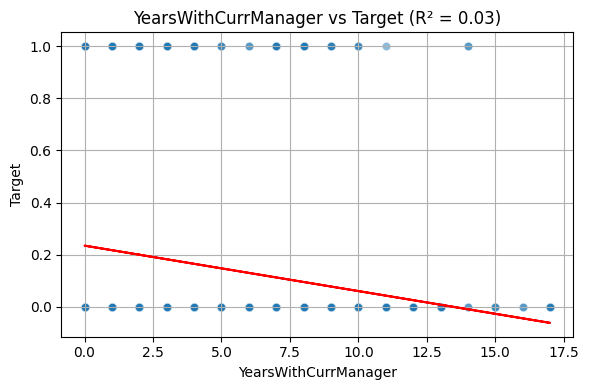

,Feature,R_squared
19,TotalWorkingYears,0.034914
25,YearsWithCurrManager,0.028490
23,YearsInCurrentRole,0.027898
9,JobLevel,0.027637
0,Age,0.025878
18,StockOptionLevel,0.020393
8,JobInvolvement,0.015643
6,EnvironmentSatisfaction,0.012576
10,JobSatisfaction,0.010691
21,WorkLifeBalance,0.006451


In [ ]:



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def check_linearity(X_train, y_train):
    results = []
    for col in X_train.columns:
        if pd.api.types.is_numeric_dtype(X_train[col]):
            X_col = X_train[[col]].dropna()
            y_col = y_train[X_col.index]

            model = LinearRegression()
            model.fit(X_col, y_col)
            y_pred = model.predict(X_col)

            r2 = r2_score(y_col, y_pred)
            results.append((col, r2))

            # Plotting
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=X_col[col], y=y_col, alpha=0.5)
            plt.plot(X_col[col], y_pred, color='red')
            plt.title(f'{col} vs Target (R² = {r2:.2f})')
            plt.xlabel(col)
            plt.ylabel('Target')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return pd.DataFrame(results, columns=['Feature', 'R_squared']).sort_values(by='R_squared', ascending=False)
check_linearity(X_train, y_train)

# Example usage: check_linearity(X_train, y_train)
# This will generate scatter plots and R² values for each numeric column vs the target.
